In [1]:
import warnings
warnings.filterwarnings('ignore')

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np

import torchvision.datasets as datasets 
import torchvision.transforms as transforms
import time

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cuda device


# MNIST HAND WRITTEN NUMBER

Define various neural network structures with tanh, sigmoid, linear, relu, define number of neurons in each layer and forward the input data to one-hot-coding for numbers 0-9. **You are NOT expected to use Convolution Layers!** <br>
*Hint: Input files are 28x28 images.*
<br>
*Hint: Use .view method in the forward function to make a column vector from 28x28 image*


In this assignment, you are expected to train your own Neural Network model. You are free to refer to resources online and bogaziciai github repository while constructing your neural network.  

In [3]:
## Normalization and create a tensor for a training/test set 

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])


mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [4]:
mnist_trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

### Step 1

Defining the structure of the neural network.

In [5]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(28*28, 64)
        self.linear2 = nn.Linear(64, 64)
        self.linear3 = nn.Linear(64, 10)

    def forward(self, img):
   
        out = img.view(img.size(0),-1)
    
        out = self.linear1(out)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        out = F.relu(out)
        return out

### Step 2

Deciding on the optimizer, number of batches, loss function and the number of epochs

In [6]:
model = Net().to(device)

create_loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0001)
batch_size = 64
epoch = 15

train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle=True)

### Step 3
Start the training.

In [7]:
for epoch in range(epoch):
    running_loss = 0.0
    start = time.time() #record run TIME
    
    for i,data in enumerate(train_loader): #In each epoch iterate the training data in the loader
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()  #Sets the gradients of all optimized torch.Tensor s to zero.
        output = model(inputs.to(device).view(-1, 28*28))
        loss = create_loss(output, labels) #calculate a loss for backpropogation
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.5f' %
            (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
            test_loss = 0
            for i, data in enumerate(test_loader):
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                output = model(inputs.to(device).view(-1, 28*28))
                loss = create_loss(output, labels)
                test_loss += loss.item()
            print("test_loss", test_loss)
            
    end=time.time()
    print("for this epoch time passed:", end-start)
        
print('Finished Training') 
        

[1,   100] loss: 2.15710
test_loss 306.08734798431396
[1,   200] loss: 1.68102
test_loss 215.9209669828415
[1,   300] loss: 1.15637
test_loss 149.18351477384567
[1,   400] loss: 0.84408
test_loss 113.74951994419098
[1,   500] loss: 0.69282
test_loss 94.90396827459335
[1,   600] loss: 0.59641
test_loss 84.09090134501457
[1,   700] loss: 0.52681
test_loss 76.51666033267975
[1,   800] loss: 0.50033
test_loss 71.47225603461266
[1,   900] loss: 0.45337
test_loss 66.37677624821663
for this epoch time passed: 40.718982458114624
[2,   100] loss: 0.43943
test_loss 61.946568071842194
[2,   200] loss: 0.41735
test_loss 60.19637420773506
[2,   300] loss: 0.39188
test_loss 57.913996547460556
[2,   400] loss: 0.39336
test_loss 56.43507780134678
[2,   500] loss: 0.38035
test_loss 55.61406388878822
[2,   600] loss: 0.35630
test_loss 54.42714101076126
[2,   700] loss: 0.36700
test_loss 52.929477751255035
[2,   800] loss: 0.34030
test_loss 52.27825431525707
[2,   900] loss: 0.33548
test_loss 50.98894770

### Step 4
Test your model's accuracy

In [8]:
correct = 0
total = 0

#Calculate predictions in test data. Call the model. Take the maximum value in one hot coding for 0-9. 

with torch.no_grad():  #The wrapper with torch.no_grad() temporarily sets all of the requires_grad flags to false
    for data in test_loader:
        inputs, labels = data
        output = model(inputs.to(device).view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == labels[idx]:
                correct +=1
            total +=1
print(f'accuracy: {round(correct/total, 3)}')

accuracy: 0.957


### Step 5

Get some training or test data samples to visualize the predictions.

Batch_Size=  64
True Label = 6 
True Label = 3 
True Label = 2 
True Label = 3 
True Label = 9 


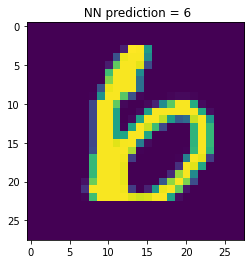

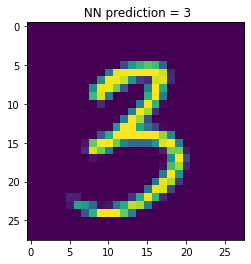

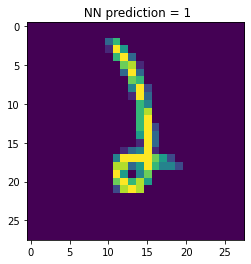

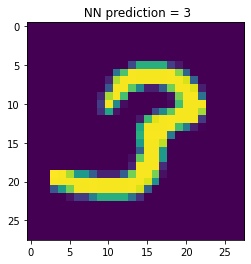

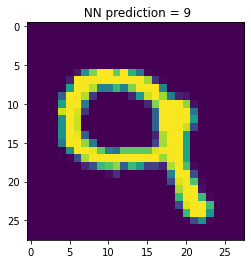

In [9]:
def TakesamplesfromNthBatch(loader,N,model):
    
    inputsout=[]
    labelsout=[]
    
    for i,data in enumerate(train_loader):
        inputs, labels = data
        inputsout=inputs.squeeze().numpy()
        labelsout=labels.numpy()    
           
        if i==N:
            prediction = model(inputs.to(device).view(-1, 784))
            predictionout = np.argmax(prediction.detach().cpu().numpy(),axis=1) 
            break

    return inputsout, labelsout, predictionout

trial_input,trial_labels,trial_prediction = TakesamplesfromNthBatch(train_loader,1,model)
print('Batch_Size= ', batch_size)

numberIntheBatch=0 
Nofexamples=5
for i in range(Nofexamples):    
    
    plt.figure()
    imgplot = plt.imshow(trial_input[numberIntheBatch])
    plt.title(' NN prediction = %i'  %trial_prediction[numberIntheBatch])
    print('True Label = %i ' %trial_labels[numberIntheBatch])
    numberIntheBatch=numberIntheBatch+1 